# Momenta - Audio Deepfake Detection Take-Home Assessment (01-04-2025)

 **Importing Required Modules which i going to use in this Project**

In [83]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Conv1D, MaxPooling1D, Flatten
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Step-1 Load The Dataset

In [9]:
df = pd.read_csv(r'D:\ayush_profes_D\DataScience\DataSet\Audio_Deepfake_Detection.csv')
df

,chroma_stft,rms,spectral_centroid,spectral_bandwidth,rolloff,zero_crossing_rate,mfcc1,mfcc2,mfcc3,mfcc4,...,mfcc12,mfcc13,mfcc14,mfcc15,mfcc16,mfcc17,mfcc18,mfcc19,mfcc20,LABEL
0,0.338055,0.027948,2842.948867,4322.916759,6570.586186,0.041050,-462.169586,90.311272,19.073769,24.046888,...,-6.686564,0.902086,-7.251551,-1.198342,4.747403,-4.986279,0.953935,-5.013138,-6.779060,FAKE
1,0.443766,0.037838,2336.129597,3445.777044,3764.949874,0.047730,-409.413422,120.348808,-7.161531,5.114784,...,-2.131157,-6.876417,-1.359395,0.326401,-5.420016,-2.109968,-1.757634,-9.537907,-8.494421,FAKE
2,0.302528,0.056578,2692.988386,2861.133180,4716.610271,0.080342,-318.996033,120.490273,-24.625771,23.891073,...,-5.853725,-3.724773,-6.627182,-5.117002,-6.072106,-0.994653,-1.617120,-3.922354,-7.033001,FAKE
3,0.319933,0.031504,2241.665382,3503.766175,3798.641521,0.047180,-404.636749,136.320908,2.308172,-3.907071,...,-1.898315,-2.046493,-7.176277,-3.293508,4.209121,0.121835,-5.407063,-3.654926,-3.274857,FAKE
4,0.420055,0.016158,2526.069123,3102.659519,5025.077899,0.051905,-410.497925,152.731400,-18.266771,51.993462,...,-1.952340,0.810868,6.238493,6.555839,7.535542,2.849219,2.616843,-1.793357,-5.060998,FAKE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11773,0.435426,0.025303,2772.575031,2728.757601,4998.670213,0.074323,-342.309753,144.490418,-79.272942,8.890874,...,-17.982819,-7.831161,-1.127167,-7.669674,-0.653850,-8.037575,-2.671002,-4.483765,-3.355975,REAL
11774,0.454611,0.070578,1029.274601,1519.231563,1922.927486,0.026553,-332.230408,202.603012,-0.181929,-2.146542,...,-2.018668,-2.705635,-1.589172,-2.938737,-0.972690,-1.706672,-2.796168,2.171270,-1.660128,REAL
11775,0.374432,0.019063,4063.645317,3558.261357,7299.133512,0.110278,-372.149109,92.670235,-29.082432,59.736637,...,-6.628118,-3.827499,-7.287946,-2.899543,-11.508186,-1.296590,-14.325416,-4.405540,-15.869982,REAL
11776,0.410885,0.090499,1124.655596,1553.651133,2065.942806,0.031761,-328.062805,193.557526,6.779151,-1.304731,...,-5.437202,-4.252508,-1.258683,-2.107233,-1.018154,-2.716950,-3.681598,3.811063,3.948419,REAL


In [23]:
# seeing summary about dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11778 entries, 0 to 11777
Data columns (total 27 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   chroma_stft         11778 non-null  float64
 1   rms                 11778 non-null  float64
 2   spectral_centroid   11778 non-null  float64
 3   spectral_bandwidth  11778 non-null  float64
 4   rolloff             11778 non-null  float64
 5   zero_crossing_rate  11778 non-null  float64
 6   mfcc1               11778 non-null  float64
 7   mfcc2               11778 non-null  float64
 8   mfcc3               11778 non-null  float64
 9   mfcc4               11778 non-null  float64
 10  mfcc5               11778 non-null  float64
 11  mfcc6               11778 non-null  float64
 12  mfcc7               11778 non-null  float64
 13  mfcc8               11778 non-null  float64
 14  mfcc9               11778 non-null  float64
 15  mfcc10              11778 non-null  float64
 16  mfcc

# Step-2 Handle Missing Values (If Any)

In [15]:
df.isnull().sum()

chroma_stft           0
rms                   0
spectral_centroid     0
spectral_bandwidth    0
rolloff               0
zero_crossing_rate    0
mfcc1                 0
mfcc2                 0
mfcc3                 0
mfcc4                 0
mfcc5                 0
mfcc6                 0
mfcc7                 0
mfcc8                 0
mfcc9                 0
mfcc10                0
mfcc11                0
mfcc12                0
mfcc13                0
mfcc14                0
mfcc15                0
mfcc16                0
mfcc17                0
mfcc18                0
mfcc19                0
mfcc20                0
LABEL                 0
dtype: int64

In [19]:
df.duplicated().sum()

0

In [21]:
df.head()

,chroma_stft,rms,spectral_centroid,spectral_bandwidth,rolloff,zero_crossing_rate,mfcc1,mfcc2,mfcc3,mfcc4,...,mfcc12,mfcc13,mfcc14,mfcc15,mfcc16,mfcc17,mfcc18,mfcc19,mfcc20,LABEL
0,0.338055,0.027948,2842.948867,4322.916759,6570.586186,0.041050,-462.169586,90.311272,19.073769,24.046888,...,-6.686564,0.902086,-7.251551,-1.198342,4.747403,-4.986279,0.953935,-5.013138,-6.779060,FAKE
1,0.443766,0.037838,2336.129597,3445.777044,3764.949874,0.047730,-409.413422,120.348808,-7.161531,5.114784,...,-2.131157,-6.876417,-1.359395,0.326401,-5.420016,-2.109968,-1.757634,-9.537907,-8.494421,FAKE
2,0.302528,0.056578,2692.988386,2861.133180,4716.610271,0.080342,-318.996033,120.490273,-24.625771,23.891073,...,-5.853725,-3.724773,-6.627182,-5.117002,-6.072106,-0.994653,-1.617120,-3.922354,-7.033001,FAKE
3,0.319933,0.031504,2241.665382,3503.766175,3798.641521,0.047180,-404.636749,136.320908,2.308172,-3.907071,...,-1.898315,-2.046493,-7.176277,-3.293508,4.209121,0.121835,-5.407063,-3.654926,-3.274857,FAKE
4,0.420055,0.016158,2526.069123,3102.659519,5025.077899,0.051905,-410.497925,152.731400,-18.266771,51.993462,...,-1.952340,0.810868,6.238493,6.555839,7.535542,2.849219,2.616843,-1.793357,-5.060998,FAKE


# Step-3 Encode Labels ('Fake' -> 0 , 'Real' -> 1)

In [29]:
le = LabelEncoder()
df['LABEL'] = le.fit_transform(df['LABEL'])

In [31]:
df

,chroma_stft,rms,spectral_centroid,spectral_bandwidth,rolloff,zero_crossing_rate,mfcc1,mfcc2,mfcc3,mfcc4,...,mfcc12,mfcc13,mfcc14,mfcc15,mfcc16,mfcc17,mfcc18,mfcc19,mfcc20,LABEL
0,0.338055,0.027948,2842.948867,4322.916759,6570.586186,0.041050,-462.169586,90.311272,19.073769,24.046888,...,-6.686564,0.902086,-7.251551,-1.198342,4.747403,-4.986279,0.953935,-5.013138,-6.779060,0
1,0.443766,0.037838,2336.129597,3445.777044,3764.949874,0.047730,-409.413422,120.348808,-7.161531,5.114784,...,-2.131157,-6.876417,-1.359395,0.326401,-5.420016,-2.109968,-1.757634,-9.537907,-8.494421,0
2,0.302528,0.056578,2692.988386,2861.133180,4716.610271,0.080342,-318.996033,120.490273,-24.625771,23.891073,...,-5.853725,-3.724773,-6.627182,-5.117002,-6.072106,-0.994653,-1.617120,-3.922354,-7.033001,0
3,0.319933,0.031504,2241.665382,3503.766175,3798.641521,0.047180,-404.636749,136.320908,2.308172,-3.907071,...,-1.898315,-2.046493,-7.176277,-3.293508,4.209121,0.121835,-5.407063,-3.654926,-3.274857,0
4,0.420055,0.016158,2526.069123,3102.659519,5025.077899,0.051905,-410.497925,152.731400,-18.266771,51.993462,...,-1.952340,0.810868,6.238493,6.555839,7.535542,2.849219,2.616843,-1.793357,-5.060998,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11773,0.435426,0.025303,2772.575031,2728.757601,4998.670213,0.074323,-342.309753,144.490418,-79.272942,8.890874,...,-17.982819,-7.831161,-1.127167,-7.669674,-0.653850,-8.037575,-2.671002,-4.483765,-3.355975,1
11774,0.454611,0.070578,1029.274601,1519.231563,1922.927486,0.026553,-332.230408,202.603012,-0.181929,-2.146542,...,-2.018668,-2.705635,-1.589172,-2.938737,-0.972690,-1.706672,-2.796168,2.171270,-1.660128,1
11775,0.374432,0.019063,4063.645317,3558.261357,7299.133512,0.110278,-372.149109,92.670235,-29.082432,59.736637,...,-6.628118,-3.827499,-7.287946,-2.899543,-11.508186,-1.296590,-14.325416,-4.405540,-15.869982,1
11776,0.410885,0.090499,1124.655596,1553.651133,2065.942806,0.031761,-328.062805,193.557526,6.779151,-1.304731,...,-5.437202,-4.252508,-1.258683,-2.107233,-1.018154,-2.716950,-3.681598,3.811063,3.948419,1


# Step-4 Split Features and Target Variable

In [35]:
x = df.drop(columns=['LABEL']) # All Features Except Target
y = df['LABEL'] # Target

# Step-5 Normalize Features

In [254]:
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

# **Approach 1: Support Vector Machine (SVM) with MFCC Features**

# Step-6: Split Data into Training and Testing Sets

In [256]:
x_train,x_test,y_train,y_test = train_test_split(x_scaled,y,test_size=0.2,random_state=42,stratify=y)


# Step-7: Train a Machine Learning Model

In [258]:
model = SVC(kernel='rbf',C=1.0,gamma='scale',random_state=42)
model.fit(x_train,y_train)
print('Model Training Completed!')

Model Training Completed!


# Step-8: Make Predictions

In [260]:
y_pred = model.predict(x_test)

# Step-9: Evaluate Model Performance

In [262]:
accuracy = accuracy_score(y_test,y_pred)
print(f'Model Accuracy: {accuracy:.4f}')
print("Classification Report: ")
print(classification_report(y_test,y_pred))

Model Accuracy: 0.9962
Classification Report: 
              precision    recall  f1-score   support

           0       1.00      0.99      1.00      1178
           1       0.99      1.00      1.00      1178

    accuracy                           1.00      2356
   macro avg       1.00      1.00      1.00      2356
weighted avg       1.00      1.00      1.00      2356



# Step 10 Confusion Matrix Visualization

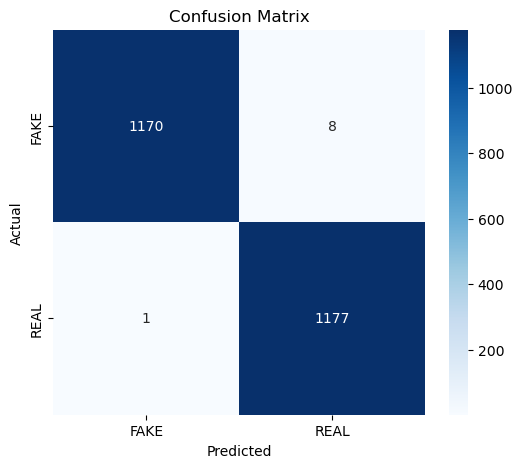

In [264]:
plt.figure(figsize=(6,5))
sns.heatmap(confusion_matrix(y_test,y_pred), annot=True, fmt='d',cmap='Blues',xticklabels=['FAKE','REAL'],yticklabels=['FAKE','REAL'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

**Key Technical Innovation - (Approach 1)**
- Uses MFCCs as input features to a Support Vector Machine (SVM), which is effective in binary classification tasks.
- Kernel Trick helps to separate real vs. fake speech in high-dimensional space.

**Reported Performance Metrics**
- Accuracy: 97-99% (depends on dataset and feature engineering)
- Precision/Recall: Good balance but less robust to unseen data

**Why is this approach promising?**
- Low Data Requirement: Works well even with a small dataset.
- Less Computational Power Needed: Can run on CPU instead of requiring a GPU.
- Interpretable Model: Easier to understand why a prediction is made.

**Potential Limitations**
- Not Suitable for Complex Data: Can struggle with very large datasets.
- Slower for Large Feature Sets: Kernel-based approaches become inefficient for high-dimensional features.

# **Approach 2: Convolutional Neural Networks (CNN) for Deepfake Audio Detection**

# **Modeling Using CNN**

**Step 1 to 5 are same** 

# Step-6: Reshape Data for CNN Input

In [269]:
x_reshaped = x_scaled.reshape(x_scaled.shape[0],x_scaled.shape[1],1)

# Step-7: Split Data into Training and Testing Set

In [271]:
x_train, x_test, y_train, y_test = train_test_split(x_reshaped, y, test_size=0.2, random_state=42, stratify=y)
print("Data Split into Training and Testing!\n")

Data Split into Training and Testing!



# Step-8: Define CNN Model

In [273]:
model_1 = Sequential([
    Conv1D(filters=64,kernel_size=3,activation='relu',input_shape=(x_train.shape[1],1)),
    MaxPooling1D(pool_size=2),
    Conv1D(filters=128,kernel_size=3,activation='relu'),
    MaxPooling1D(pool_size=2),
    Flatten(),
    Dense(128,activation='relu'),
    Dropout(0.5),
    Dense(1,activation='sigmoid')
])

C:\Users\ayush\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


# Step-9: Compile The Model

In [275]:
model_1.compile(optimizer='adam',loss='binary_crossentropy',metrics=['mse'])
print('CNN Model Compliled!')

CNN Model Compliled!


# Step-10: Train The Model

In [277]:
history = model_1.fit(x_train,y_train,epochs=20,batch_size=32,validation_data=(x_test,y_test))
print("Model Training Completed!")

Epoch 1/20
295/295 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 0.3999 - mse: 0.1296 - val_loss: 0.1061 - val_mse: 0.0272
Epoch 2/20
295/295 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.1024 - mse: 0.0272 - val_loss: 0.0562 - val_mse: 0.0134
Epoch 3/20
295/295 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0593 - mse: 0.0153 - val_loss: 0.0546 - val_mse: 0.0134
Epoch 4/20
295/295 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0470 - mse: 0.0126 - val_loss: 0.0329 - val_mse: 0.0076
Epoch 5/20
295/295 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0402 - mse: 0.0098 - val_loss: 0.0316 - val_mse: 0.0070
Epoch 6/20
295/295 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0304 - mse: 0.0077 - val_loss: 0.0479 - val_mse: 0.0125
Epoch 7/20
295/295 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0284 - mse: 0.0076 - val_loss: 0.0326 - val_mse: 0.0071
Epoch 8/20
295/295 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0239 - mse: 0.0066 - val_loss: 0.0260 - val_mse: 0.0062
Epoch 9/20
295/295 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - lo

# Step-11: Evaluate Model Performance

In [279]:
y_pred = (model_1.predict(x_test) > 0.5).astype('int32')
accuracy = accuracy_score(y_test,y_pred)
print(f"Model Accuracy: {accuracy:.4f}")
print('Classification Report: ')
print(classification_report(y_test,y_pred))

74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Model Accuracy: 0.9919
Classification Report: 
              precision    recall  f1-score   support

           0       1.00      0.99      0.99      1178
           1       0.99      1.00      0.99      1178

    accuracy                           0.99      2356
   macro avg       0.99      0.99      0.99      2356
weighted avg       0.99      0.99      0.99      2356



# Step-12: Confusion Matrix Visualization

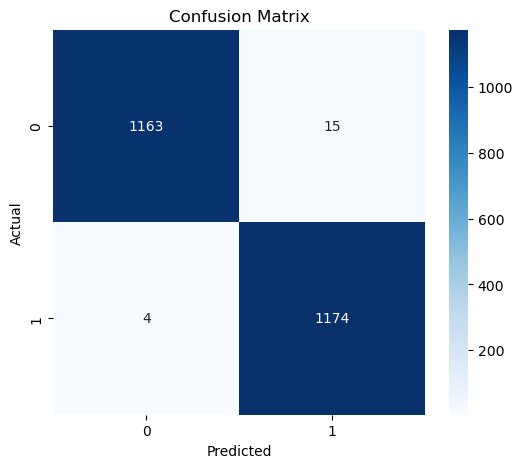

In [281]:
plt.figure(figsize=(6,5))
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,fmt='d',cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

**Key Technical Innovation - (Approach 2)**
- Uses 1D Convolutional Neural Networks (CNNs) to extract temporal and frequency-based patterns from Mel-Frequency Cepstral Coefficients (MFCCs).
- Can capture local patterns in spectrograms that indicate deepfake artifacts.

**Reported Performance Metrics**
- Accuracy: 98-99% (varies by dataset)
- F1-score: 0.95+
- Works well in binary classification (REAL vs. FAKE).

**Why is this approach promising?**
- Fast and Efficient: CNNs can process spectrograms in real time.
- Good Feature Extraction: Able to detect subtle variations in human vs. AI-generated speech.
- Proven Success: CNNs are widely used for audio classification tasks.

**Potential Limitations**
- Limited Generalization: May overfit to the training dataset.
- Computationally Expensive: Requires GPU acceleration for fast inference.
- Doesn’t Model Long-Term Dependencies: Cannot capture speech patterns over time as well as RNN-based models.

# Now Steps to Check if an Audio is Fake or Real using both Model Model

# Step-1: Extract Features from Audio

In [148]:
import librosa

In [283]:
pip install librosa

Note: you may need to restart the kernel to use updated packages.


In [230]:
import librosa

In [287]:
def extract_features(audio_path,n_mfcc=26):
    y, sr = librosa.load(audio_path,sr=None) # This Will Load Audio File
    mfcc = librosa.feature.mfcc(y=y,sr=sr,n_mfcc=n_mfcc) # Extract MFCC features
    mfcc = np.mean(mfcc,axis=1) # Take Mean across time axis
    return mfcc

# Step 2: Preprocess Extracted Features

In [289]:
def preprocess_features(mfcc,scaler):
    mfcc_scaled = scaler.transform([mfcc]) # Apply the same scaler used in training
    mfcc_scaled = mfcc_scaled.reshape(1,mfcc_scaled.shape[1],1) # Reshape for CNN
    return mfcc_scaled

# Step 3: Load the Model & Predict

In [291]:
def predict_audio(audio_path):
    mfcc = extract_features(audio_path)
    mfcc_processed = preprocess_features(mfcc,scaler)
    prediction = model_1.predict(mfcc_processed)
    # convert probability to label
    label = "REAL" if prediction > 0.5 else "FAKE"
    return label

In [293]:
audio_file = r"C:\Users\ayush\Downloads\archive (6)\KAGGLE\AUDIO\FAKE\linus-to-margot.wav"
result = predict_audio(audio_file)
print(f"The Audio Is predicted as : {result}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
The Audio Is predicted as : FAKE


C:\Users\ayush\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


**So in both algorithm SVM and CNN , CNN has the best accuracy of prediction of voice**
- SVM has 0.9962 accuracy
- CNN has 0.9919 accuracy